# Sales Data Analysis
Steps follow to analyse:
1. Business Understanding
2. Problem Statement
3. Data Understanding
4. Data Analysis

# 1.Business Understanding
Sales data is given for a company for the year of 2019.

# 2. Problem Statement
Sales data need to analyze to identify trends, top selling products and revenue matrics for
business decision-making

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv(r"C:\Users\Shivangi\Desktop\Sales Data.csv")
df.head()

,S.No,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,30-12-2019 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,29-12-2019 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,12-12-2019 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,22-12-2019 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,18-12-2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [9]:
df.shape #There are altogether 185950 sales of different product

(185950, 11)

In [11]:
df.columns

Index(['S.No', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [12]:
df.describe()  #There is at least one order to maximum 9 ordres with one unique order id. 
                #The cheap product costs 2.99 where as expensive product costs 1700.00 for each item.

,S.No,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


# Data Understanding
1. S.No: Serial Number
2. Order ID: Unique ID for any order
3. Quantity Ordered: Number of items ordered on a particular order ID
4. Price Each: Cost of each item
5. Order Date: Date of sale
6. Purchase Address: Address of the purchaser
7. Month: Month of sales
8. Sales: Total sale price
9. City: City from where items were purchased
10. Hour: Time when the product were sale

In [13]:
df.isnull().sum()  #There are no null values

S.No                0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [19]:
#Let us find the unique products that the company produce and sell.
#There are altogether 19 different products that this company is selling.

df["Product"].unique()


array(['Macbook Pro Laptop', 'LG Washing Machine', 'USB-C Charging Cable',
       '27in FHD Monitor', 'AA Batteries (4-pack)',
       'Bose SoundSport Headphones', 'AAA Batteries (4-pack)',
       'ThinkPad Laptop', 'Lightning Charging Cable', 'Google Phone',
       'Wired Headphones', 'Apple Airpods Headphones', 'Vareebadd Phone',
       'iPhone', '20in Monitor', '34in Ultrawide Monitor',
       'Flatscreen TV', '27in 4K Gaming Monitor', 'LG Dryer'],
      dtype=object)

In [18]:
df["City"].unique()  #There are 9 unique countries 

array([' New York City', ' San Francisco', ' Atlanta', ' Portland',
       ' Dallas', ' Los Angeles', ' Boston', ' Austin', ' Seattle'],
      dtype=object)

# Let's plot differet figures to find out more insights from the data

<AxesSubplot:xlabel='Price Each'>

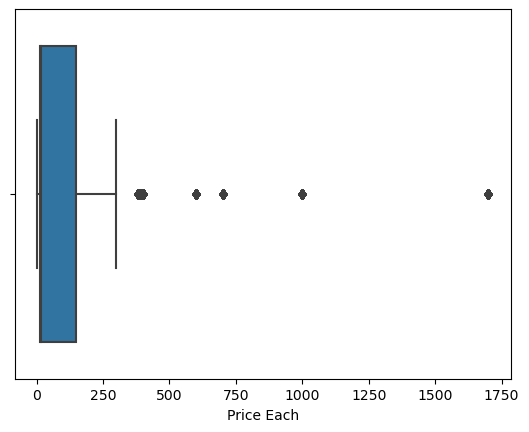

In [20]:
#Box plot to find see the price distribution

sns.boxplot(x=df["Price Each"])


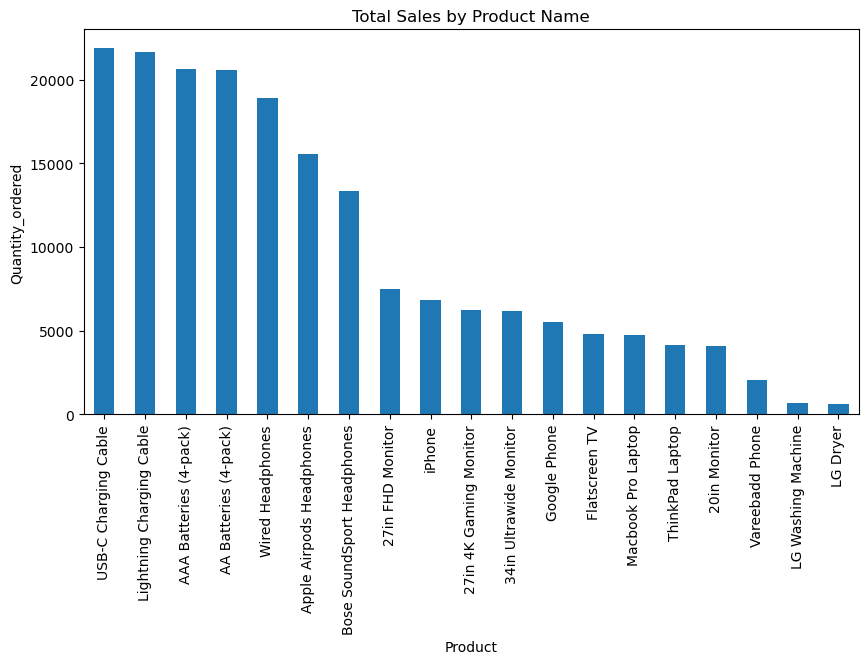

In [21]:
# Plot different features against one another (scatter), against frequency (histogram)
#plotting histogram

df.Product.value_counts().nlargest(19).plot(kind="bar", figsize=(10,5))
plt.title("Total Sales by Product Name")
plt.ylabel("Quantity_ordered")
plt.xlabel("Product");

In [22]:
df1 = df.groupby("Product")["Sales"].sum() #Add total sales of each product
df2 = df1.to_frame(name = "Sales") 
df2 = df2.reset_index()
df2.head()

,Product,Sales
0,20in Monitor,454148.71
1,27in 4K Gaming Monitor,2435097.56
2,27in FHD Monitor,1132424.50
3,34in Ultrawide Monitor,2355558.01
4,AA Batteries (4-pack),106118.40


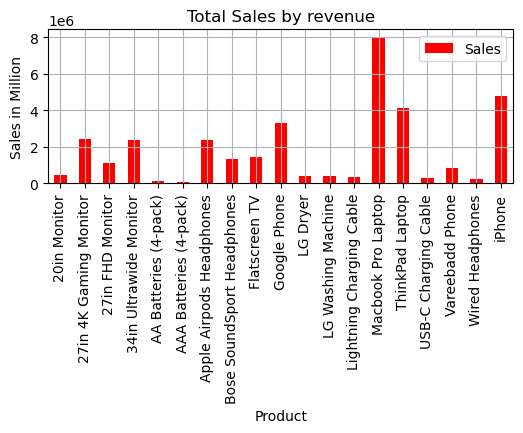

In [23]:
df2.plot(x="Product", y="Sales", kind="bar", figsize=(6,2), color='r', grid=True)
plt.title('Total Sales by revenue')
plt.xlabel('Product')
plt.ylabel('Sales in Million')
plt.legend()
plt.show()

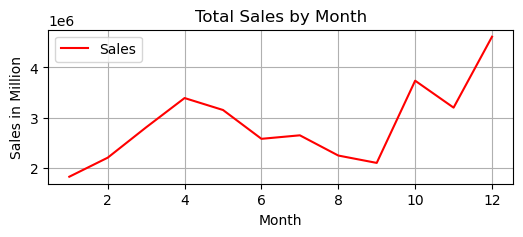

In [24]:
df1 = df.groupby("Month")["Sales"].sum() #Add total sales of each product accoding to 
df2 = df1.to_frame(name = "Sales") 
df2 = df2.reset_index()
df2.plot(x="Month", y="Sales", kind="line", figsize=(6,2), color='r', grid=True)
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales in Million')
plt.legend()
plt.show()

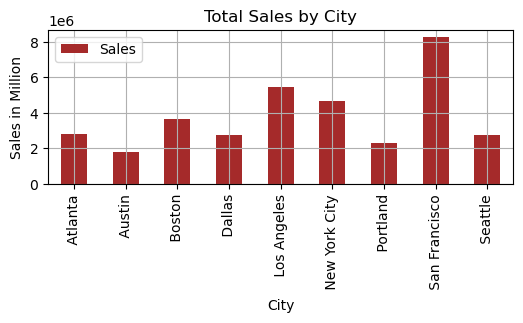

In [29]:
df1 = df.groupby("City")["Sales"].sum() 
df2 = df1.to_frame(name = "Sales")
df2 = df2.reset_index()
df2.plot(x="City", y="Sales", kind="bar", figsize=(6,2), color='brown', grid=True)
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Sales in Million')
plt.legend()
plt.show()

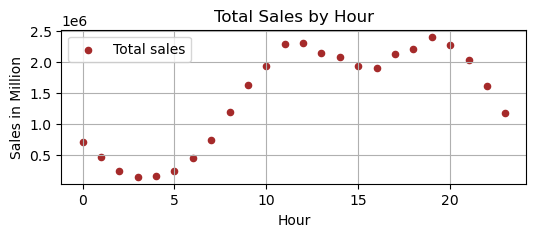

In [32]:
df1 = df.groupby("Hour")["Sales"].sum() 
df2 = df1.to_frame(name = "Sales") 
df2 = df2.reset_index()
df2.plot(x="Hour", y="Sales", kind="scatter", figsize=(6,2), color='brown', grid=True, label = 'Total sales')
plt.title('Total Sales by Hour')
plt.xlabel('Hour')
plt.ylabel('Sales in Million')
plt.legend()
plt.show()

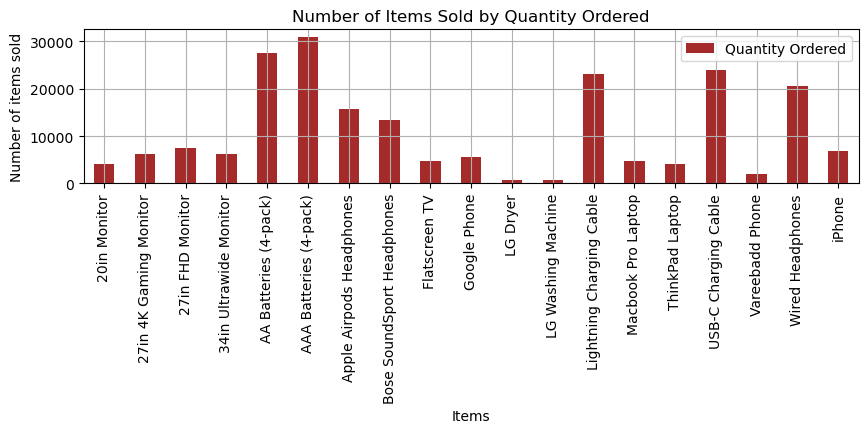

In [33]:
df1 = df.groupby("Product")["Quantity Ordered"].sum() 
df2 = df1.to_frame(name = "Quantity Ordered") 
df2 = df2.reset_index()
df2.plot(x="Product", y="Quantity Ordered", kind="bar", figsize=(10,2), color='brown', grid=True)
plt.title('Number of Items Sold by Quantity Ordered')
plt.xlabel('Items')
plt.ylabel('Number of items sold')
#plt.legend()
plt.xticks(rotation=90)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


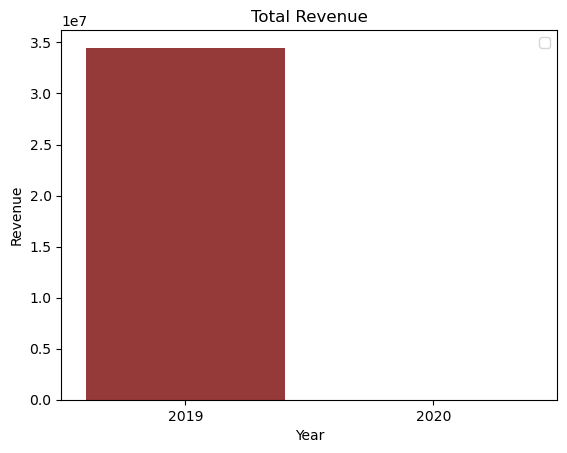

In [35]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Year"] = df["Order Date"].dt.year
yearly_revenue = df.groupby(["Year"])["Sales"].sum().reset_index()
sns.barplot(x="Year", y="Sales", data=yearly_revenue, color="brown")
plt.title('Total Revenue')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.legend()
plt.show()

# 4. Data Analysis
Summary of Data Analysis
1. Total revenue generated in 2019 was around 35 Million.
2. There were altogether 185950 sales of different product.
3. All the fields have complete sets of information. There is not any null value in any column.
4. There were altogether 19 different products that this company was selling.
5. Customers from 9 cities are buying 19 products from the company.
6. The company was selling products for all 12 months.
7. For 24 hours company was selling the products.
8. There was at least one order to maximum 9 ordres with one unique order id.
9. The cheap product (AAA Batteries(4-pack)) cost 2.99 where as expensive product (Macbook
pro laptop) cost 1700 for each item.
10. Out of 19 items four crosses 500.Two products cost between 300 and 500, price for rest of
the products are below 250.
11. The highest sold item for the year 2019 was USB-C Charging Cable, which was more than
20000 in numbers.
12. The Macbook Pro Laptop has the highest selling record of around 8.0 M.
13. Which is followed by iphone around 5.0 M and ThinkPad Laptop around 4.0 M.
14. Out of 19 items 7 products crosses 2.0 M sale and 9 items sale didnot cross 1.0 M.
15. December was the highest Sales month which is nearly 5.0 M.
16. Months April, May, October, November and December corsses the sale of 3.0 M.
17. San Francisco spent highest amount of money to buy company products which was around
(8 M) 24% of toal cost 34 M.
18. Whereas, Austin spent lowest amount whcih was nearly equal to 5% (2 M).
19. Between 10 a.m. and 8 p.m. company sold around 2 to 2.4 M each hour.
20. Whereas, total selling lower down in other hours.